In [89]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_set = pd.read_csv(r'C:\Users\NSharma\Documents\datascience\HousingProject\dataset\prepared_data.csv')
target_set = pd.read_csv(r'C:\Users\NSharma\Documents\datascience\HousingProject\dataset\clean_train_dataset.csv')
test_set = pd.read_csv(r'C:\Users\NSharma\Documents\datascience\HousingProject\dataset\test_set.csv')


In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               16512 non-null  int64  
 1   longitude                16512 non-null  float64
 2   latitude                 16512 non-null  float64
 3   median_income            16512 non-null  float64
 4   total_bedrooms_per_room  16512 non-null  float64
 5   INLAND                   16512 non-null  float64
 6   ISLAND                   16512 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 903.1 KB


In [4]:
target_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                16512 non-null  int64  
 1   longitude                 16512 non-null  float64
 2   latitude                  16512 non-null  float64
 3   housing_median_age        16512 non-null  float64
 4   total_rooms               16512 non-null  float64
 5   total_bedrooms            16512 non-null  float64
 6   population                16512 non-null  float64
 7   households                16512 non-null  float64
 8   median_income             16512 non-null  float64
 9   median_house_value        16512 non-null  float64
 10  ocean_proximity           16512 non-null  object 
 11  room_per_household        16512 non-null  float64
 12  population_per_household  16512 non-null  float64
 13  total_bedrooms_per_room   16512 non-null  float64
dtypes: flo

In [5]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          4128 non-null   int64  
 1   longitude           4128 non-null   float64
 2   latitude            4128 non-null   float64
 3   housing_median_age  4128 non-null   float64
 4   total_rooms         4128 non-null   float64
 5   total_bedrooms      4084 non-null   float64
 6   population          4128 non-null   float64
 7   households          4128 non-null   float64
 8   median_income       4128 non-null   float64
 9   median_house_value  4128 non-null   float64
 10  ocean_proximity     4128 non-null   object 
dtypes: float64(9), int64(1), object(1)
memory usage: 354.9+ KB


In [6]:
train_df = train_set.drop('Unnamed: 0',axis=1)
target_df = target_set.drop(['Unnamed: 0', 'longitude', 'latitude', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income', 'ocean_proximity',
       'room_per_household', 'population_per_household',
       'total_bedrooms_per_room'],axis=1)

test_df = test_set.drop('Unnamed: 0',axis=1)


In [7]:
target_df.head()

,median_house_value
0,291000.0
1,156100.0
2,353900.0
3,241200.0
4,53800.0


In [8]:
train_df.head()

,longitude,latitude,median_income,total_bedrooms_per_room,INLAND,ISLAND
0,1.172958,-1.350374,0.379686,-0.456507,-0.685225,-0.017404
1,1.267990,-1.378495,0.420056,-0.526113,-0.685225,-0.017404
2,-1.352898,0.988319,-0.092317,0.198892,-0.685225,-0.017404
3,-1.127822,0.758668,0.682979,-0.908892,-0.685225,-0.017404
4,1.793168,-1.083229,-1.255522,-0.348929,1.459286,-0.017404


In [9]:
test_df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.38,40.67,10.0,2281.0,444.0,1274.0,438.0,2.2120,65600.0,INLAND
1,-118.37,33.83,35.0,1207.0,207.0,601.0,213.0,4.7308,353400.0,<1H OCEAN
2,-117.24,32.72,39.0,3089.0,431.0,1175.0,432.0,7.5925,466700.0,NEAR OCEAN
3,-118.44,34.05,18.0,4780.0,1192.0,1886.0,1036.0,4.4674,500001.0,<1H OCEAN
4,-118.44,34.18,33.0,2127.0,414.0,1056.0,391.0,4.3750,286100.0,<1H OCEAN


# Step-7: Preprocessing the test set

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4084 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 322.6+ KB


Let's fix missing values in column 'total_bedrooms':

In [11]:
largest_freq =test_df['total_bedrooms'].value_counts().idxmax()

In [12]:
test_df['total_bedrooms'].value_counts()

total_bedrooms
361.0     19
369.0     15
344.0     15
256.0     14
339.0     14
          ..
5290.0     1
2098.0     1
850.0      1
1260.0     1
2244.0     1
Name: count, Length: 1197, dtype: int64

Let's fill missing values with 361.

In [13]:
test_df['total_bedrooms'].replace(np.nan,largest_freq,inplace=True)

In [14]:
test_df['total_bedrooms'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4128 entries, 0 to 4127
Series name: total_bedrooms
Non-Null Count  Dtype  
--------------  -----  
4128 non-null   float64
dtypes: float64(1)
memory usage: 32.4 KB


In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4128 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 322.6+ KB


Let's combine attributes and drop unncessary ones

In [16]:
test_df['room_per_household'] = test_df['total_rooms']/test_df['households']
test_df['population_per_household'] = test_df['population']/test_df['households']
test_df['total_bedrooms_per_room'] = test_df['total_bedrooms']/test_df['total_rooms']

Let's see categorical variable:


In [17]:
dummy = pd.get_dummies(test_df['ocean_proximity'])

In [18]:
dummy.columns

Index(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype='object')

In [19]:
dummy.drop(['<1H OCEAN','NEAR OCEAN'],axis=1,inplace=True)

In [20]:
dummy[['INLAND','NEAR BAY']]=dummy[['INLAND','NEAR BAY']].astype('int')

In [21]:
dummy.rename(columns={"NEAR BAY":"ISLAND"},inplace=True)

In [22]:
dummy['ISLAND'].fillna(0)

0       0
1       0
2       0
3       0
4       0
       ..
4123    0
4124    1
4125    0
4126    0
4127    0
Name: ISLAND, Length: 4128, dtype: int32

In [23]:
dummy.head()

,INLAND,ISLAND
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0


In [24]:
test_df  = pd.concat([test_df,dummy],axis=1)

In [25]:
test_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'room_per_household',
       'population_per_household', 'total_bedrooms_per_room', 'INLAND',
       'ISLAND'],
      dtype='object')

In [26]:
test_df.drop(['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 
       'ocean_proximity', 'room_per_household',
       'population_per_household'],axis=1,inplace=True)

In [27]:
test_df.columns

Index(['longitude', 'latitude', 'median_income', 'median_house_value',
       'total_bedrooms_per_room', 'INLAND', 'ISLAND'],
      dtype='object')

In [28]:
target_test = test_df.drop(['longitude', 'latitude', 'median_income','total_bedrooms_per_room', 'INLAND', 'ISLAND'],axis=1)

In [29]:
target_test.columns

Index(['median_house_value'], dtype='object')

In [30]:
test_df.drop(['median_house_value'],axis=1,inplace=True)

Let's normalize

In [31]:
test_df.columns

Index(['longitude', 'latitude', 'median_income', 'total_bedrooms_per_room',
       'INLAND', 'ISLAND'],
      dtype='object')

In [32]:
for col in test_df.columns.to_list():
    test_df[col]=(test_df[col]-test_df[col].mean())/test_df[col].std()

In [33]:
test_df.head()

,longitude,latitude,median_income,total_bedrooms_per_room,INLAND,ISLAND
0,-1.381871,2.347302,-0.902554,-0.296192,1.495695,-0.355386
1,0.602865,-0.841041,0.445007,-0.672616,-0.668423,-0.355386
2,1.162155,-1.358447,1.976020,-1.192449,-0.668423,-0.355386
3,0.568219,-0.738492,0.304088,0.593509,-0.668423,-0.355386
4,0.568219,-0.677895,0.254653,-0.296373,-0.668423,-0.355386


# Step - 7: Model Training and evaluation

Let's define plotting functions for better visualization

In [90]:
#Give arguements as nd array or pandas series

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width=12
    height=10
    plt.figure(figsize=(width,height))

    ax1=sns.kdeplot(RedFunction,color="r",label=RedName)
    ax2=sns.kdeplot(BlueFunction,color="b",label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('median_house_value')
    plt.ylabel('Density')
    plt.show()
    plt.close()



Let's start with multiple linear regression:

In [34]:
from sklearn.linear_model import LinearRegression 

In [35]:
lm=LinearRegression()

In [36]:
Z=train_df[train_df.columns.to_list()]

In [37]:
lm.fit(Z,target_df)

LinearRegression()

In [38]:
y_hat=lm.predict(test_df)


Let's try to plot and see

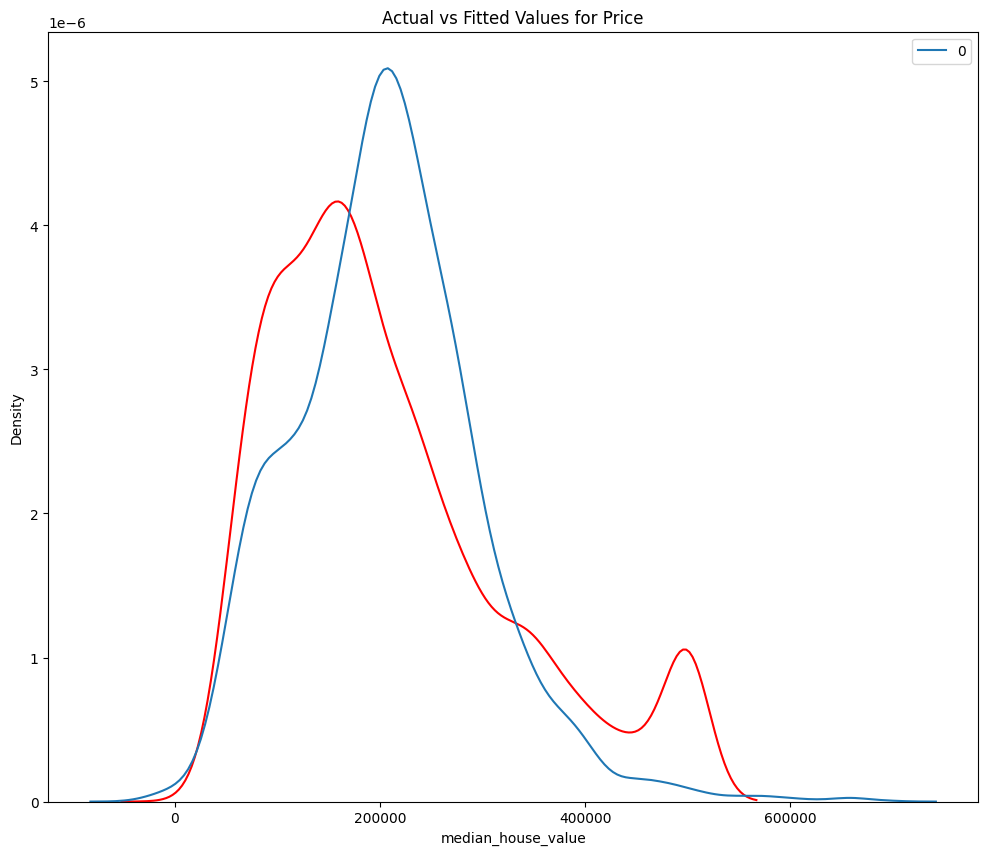

In [92]:
#plt.figure(figsize=(20,15))

#ax1=sns.distplot(target_test,hist=False,color='r',label='Actual Value')
##sns.distplot(y_hat,hist=False,color='b',label='Fitted Values', ax=ax1)

Title="Actual vs Fitted Values for Price"
DistributionPlot(target_test.median_house_value,y_hat,"Actual Values","Predicted Values",Title)


In [40]:
from sklearn.metrics import r2_score
r_squared = r2_score(target_test,y_hat)
print(f"The R2 score for Multiple Linear Regression is {r_squared}")

The R2 score for Multiple Linear Regression is 0.6069510861981935


# Step-8: Cross validation

In [43]:
data_df = pd.concat([train_df,test_df],axis=0)

In [44]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20640 entries, 0 to 4127
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   longitude                20640 non-null  float64
 1   latitude                 20640 non-null  float64
 2   median_income            20640 non-null  float64
 3   total_bedrooms_per_room  20640 non-null  float64
 4   INLAND                   20640 non-null  float64
 5   ISLAND                   20640 non-null  float64
dtypes: float64(6)
memory usage: 1.1 MB


In [45]:
target_data_df=pd.concat([target_df,target_test],axis=0)

In [46]:
target_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20640 entries, 0 to 4127
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_house_value  20640 non-null  float64
dtypes: float64(1)
memory usage: 322.5 KB


In [57]:
from sklearn.model_selection import cross_val_score

Rcross = cross_val_score(lm,data_df,target_data_df,cv=4)

In [58]:
Rcross

array([0.6113052 , 0.60498357, 0.59666145, 0.61511089])

In [59]:
Rcross.mean()

0.6070152752752644

In [60]:
Rcross.std()

0.006986986353836235

Trained model seems robust enough!

Let's now plot between predicted values and actual values

In [61]:
from sklearn.model_selection import cross_val_predict

y_hat_cv = cross_val_predict(lm,data_df,target_data_df,cv=4)

c:\Users\NSharma\Documents\datascience\HousingProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\NSharma\Documents\datascience\HousingProject\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\NSharma\Documents\datascience\HousingProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\NSharma\Documents\datascience\HousingProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is

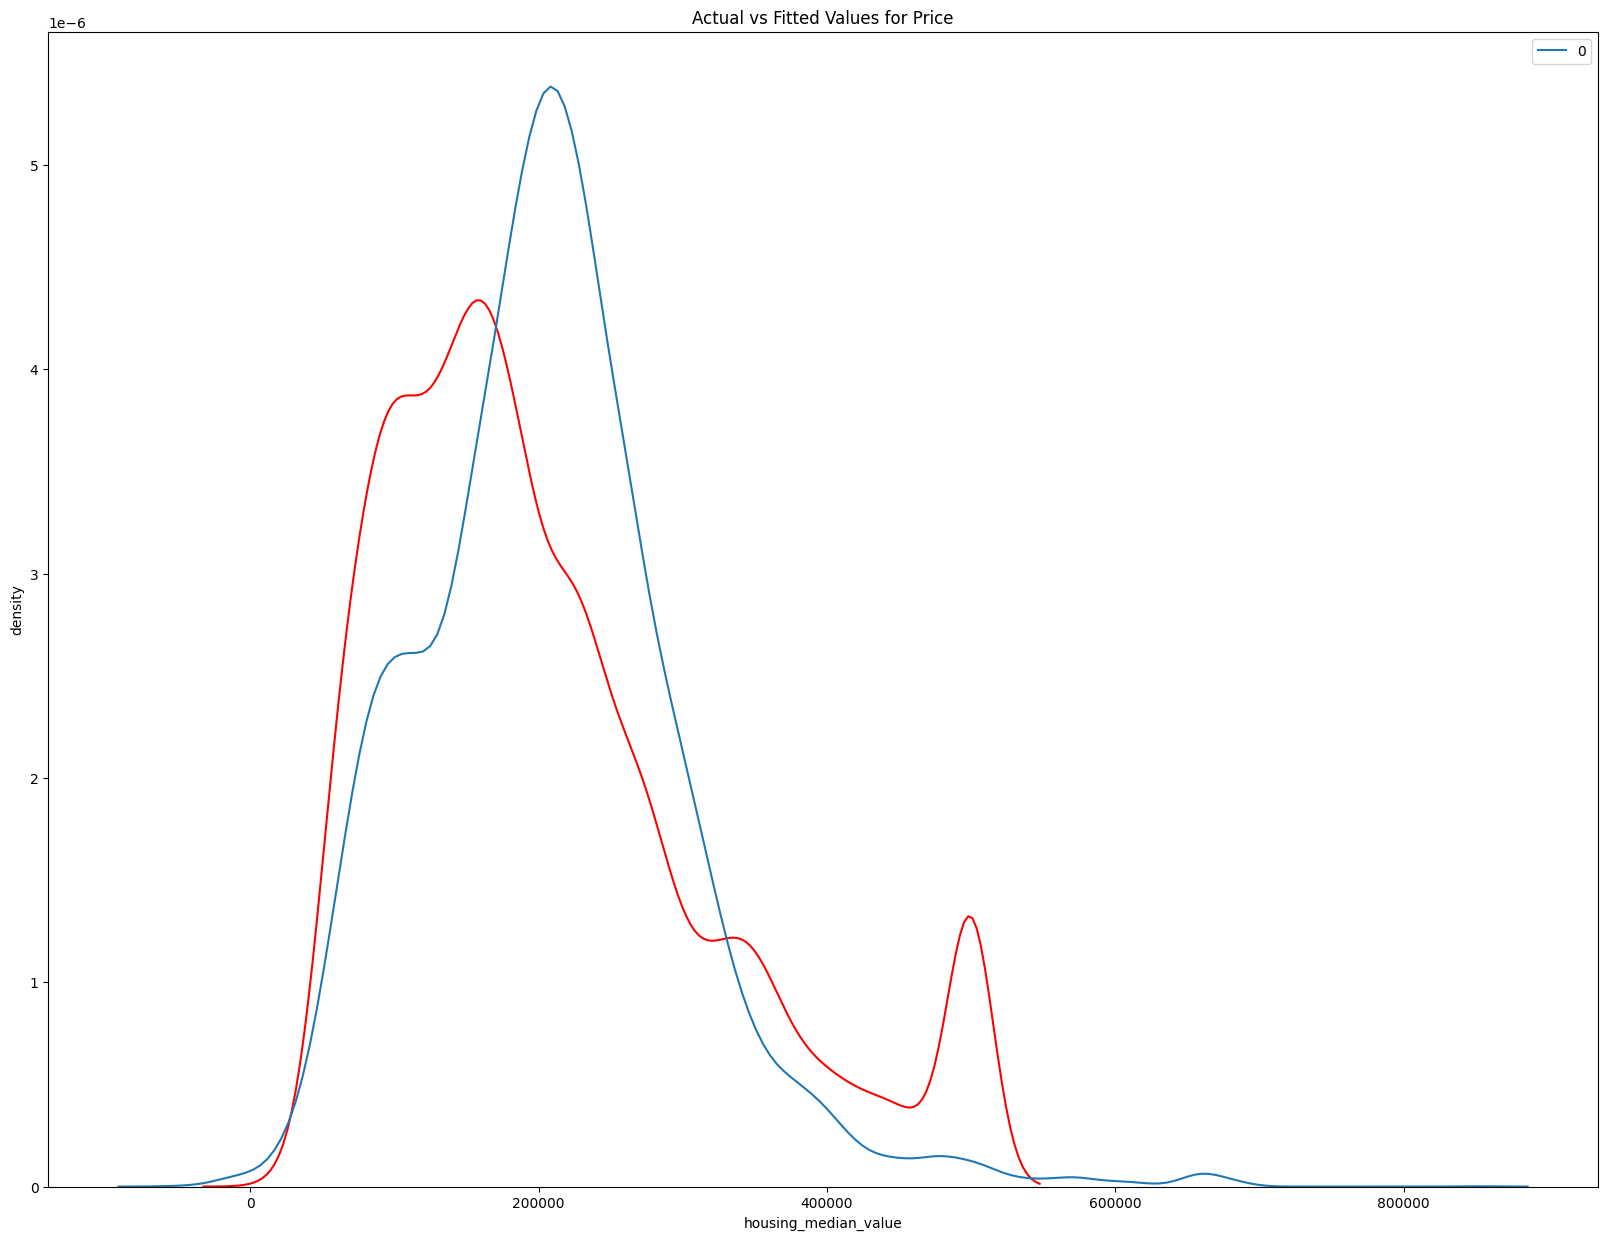

In [88]:
plt.figure(figsize=(20,15))
ax1=sns.kdeplot(target_data_df.median_house_value,color="r")
sns.kdeplot(y_hat_cv,color="b")

plt.title("Actual vs Fitted Values for Price")
plt.ylabel('density')
plt.xlabel('housing_median_value')
plt.legend
plt.show()